In [1]:
#load the data
import pandas as pd
df = pd.read_csv(r"C:\Users\Manikanta\Downloads\pharma_sales_uncleaned.csv")
df

,Invoice_ID,Date,Product,Units_Sold,Unit_Price,Total_Sales,Region
0,INV1360,2023-12-27,Paracetamol,30.0,5.0,150.0,West
1,INV1921,2025-07-10,Paracetamol,NaN,50.0,NaN,East
2,INV1617,2024-09-09,Paracetamol,100.0,20.0,2000.0,North
3,INV1455,2024-03-31,Ibuprofen,30.0,NaN,NaN,East
4,INV1152,2023-06-02,Amoxicillin,NaN,5.0,NaN,West
...,...,...,...,...,...,...,...
995,INV1188,2023-07-08,Amoxicillin,NaN,10.0,NaN,North
996,INV1906,2025-06-25,NaN,20.0,NaN,NaN,North
997,INV1287,2023-10-15,Amoxicillin,NaN,NaN,NaN,West
998,INV1714,2024-12-15,Amoxicillin,50.0,5.0,250.0,North


In [2]:
#finding the null or missing values
df.isnull().sum()

Invoice_ID       0
Date             0
Product        155
Units_Sold     175
Unit_Price     167
Total_Sales    308
Region         196
dtype: int64

In [18]:
df['Region'].fillna(df['Region'].mode()[0],inplace=True)
df['Product'].fillna(df['Product'].mode()[0],inplace=True)

C:\Users\Manikanta\AppData\Local\Temp\ipykernel_25692\3764749096.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product'].fillna(df['Product'].mode()[0],inplace=True)


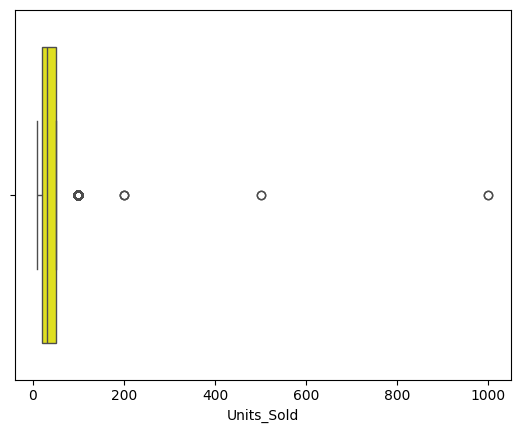

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Units_Sold'],color='yellow')
plt.show()

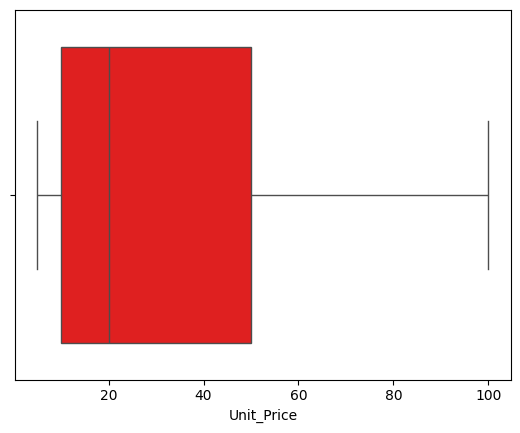

In [25]:
sns.boxplot(x=df['Unit_Price'],color='Red')
plt.show()

In [26]:
#filling missing values in unit price and sold
df['Units_Sold'].fillna(df['Units_Sold'].median(),inplace=True)
df['Unit_Price'].fillna(df['Unit_Price'].median(),inplace=True)

C:\Users\Manikanta\AppData\Local\Temp\ipykernel_25692\3106847017.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Units_Sold'].fillna(df['Units_Sold'].median(),inplace=True)
C:\Users\Manikanta\AppData\Local\Temp\ipykernel_25692\3106847017.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [28]:
df.head(10)

,Invoice_ID,Date,Product,Units_Sold,Unit_Price,Total_Sales,Region
0,INV1360,2023-12-27,Paracetamol,30.0,5.0,150.0,West
1,INV1921,2025-07-10,Paracetamol,30.0,50.0,NaN,East
2,INV1617,2024-09-09,Paracetamol,100.0,20.0,2000.0,North
3,INV1455,2024-03-31,Ibuprofen,30.0,20.0,NaN,East
4,INV1152,2023-06-02,Amoxicillin,30.0,5.0,NaN,West
5,INV1116,2023-04-27,Paracetamol,30.0,5.0,NaN,West
6,INV1080,2023-03-22,Ibuprofen,50.0,50.0,2500.0,South
7,INV1274,2023-10-02,Cetirizine,10.0,50.0,500.0,East
8,INV1346,2023-12-13,Amoxicillin,20.0,100.0,2000.0,North
9,INV1655,2024-10-17,Paracetamol,20.0,100.0,2000.0,West


In [29]:
df.drop(columns=['Total_Sales'],inplace=True)

In [32]:
df['Sales_Amount']=(df['Units_Sold']*df['Unit_Price']).round(2)

In [34]:
#finding duplicates
df.duplicated().sum()

0

In [35]:
#Top selling product
top_products = df.groupby('Product')['Sales_Amount'].sum().sort_values(ascending = False)
top_products

Product
Paracetamol    571900.0
Cetirizine     292250.0
Metformin      274700.0
Ibuprofen      217500.0
Amoxicillin    201600.0
Name: Sales_Amount, dtype: float64

In [36]:
# Region wise performance
region_sales = df.groupby('Region')['Sales_Amount'].sum().sort_values(ascending=False)
region_sales

Region
West     652950.0
East     325700.0
North    291600.0
South    287700.0
Name: Sales_Amount, dtype: float64

In [39]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales_Amount'].sum()
monthly_sales

Month
2023-01    48050.0
2023-02    87900.0
2023-03    41700.0
2023-04    54900.0
2023-05    47400.0
2023-06    52150.0
2023-07    30750.0
2023-08    43000.0
2023-09    25450.0
2023-10    63700.0
2023-11    40800.0
2023-12    52700.0
2024-01    33100.0
2024-02    29550.0
2024-03    48450.0
2024-04    36450.0
2024-05    34200.0
2024-06    45500.0
2024-07    47250.0
2024-08    62750.0
2024-09    62550.0
2024-10    75100.0
2024-11    30750.0
2024-12    72300.0
2025-01    42350.0
2025-02    24500.0
2025-03    89750.0
2025-04    55050.0
2025-05    31500.0
2025-06    47000.0
2025-07    31250.0
2025-08    30800.0
2025-09    39300.0
Freq: M, Name: Sales_Amount, dtype: float64

In [41]:
monthly_sales = df.groupby('Month')['Sales_Amount'].sum().sort_index()


Month
2023-01    48050.0
2023-02    87900.0
2023-03    41700.0
2023-04    54900.0
2023-05    47400.0
2023-06    52150.0
2023-07    30750.0
2023-08    43000.0
2023-09    25450.0
2023-10    63700.0
2023-11    40800.0
2023-12    52700.0
2024-01    33100.0
2024-02    29550.0
2024-03    48450.0
2024-04    36450.0
2024-05    34200.0
2024-06    45500.0
2024-07    47250.0
2024-08    62750.0
2024-09    62550.0
2024-10    75100.0
2024-11    30750.0
2024-12    72300.0
2025-01    42350.0
2025-02    24500.0
2025-03    89750.0
2025-04    55050.0
2025-05    31500.0
2025-06    47000.0
2025-07    31250.0
2025-08    30800.0
2025-09    39300.0
Freq: M, Name: Sales_Amount, dtype: float64

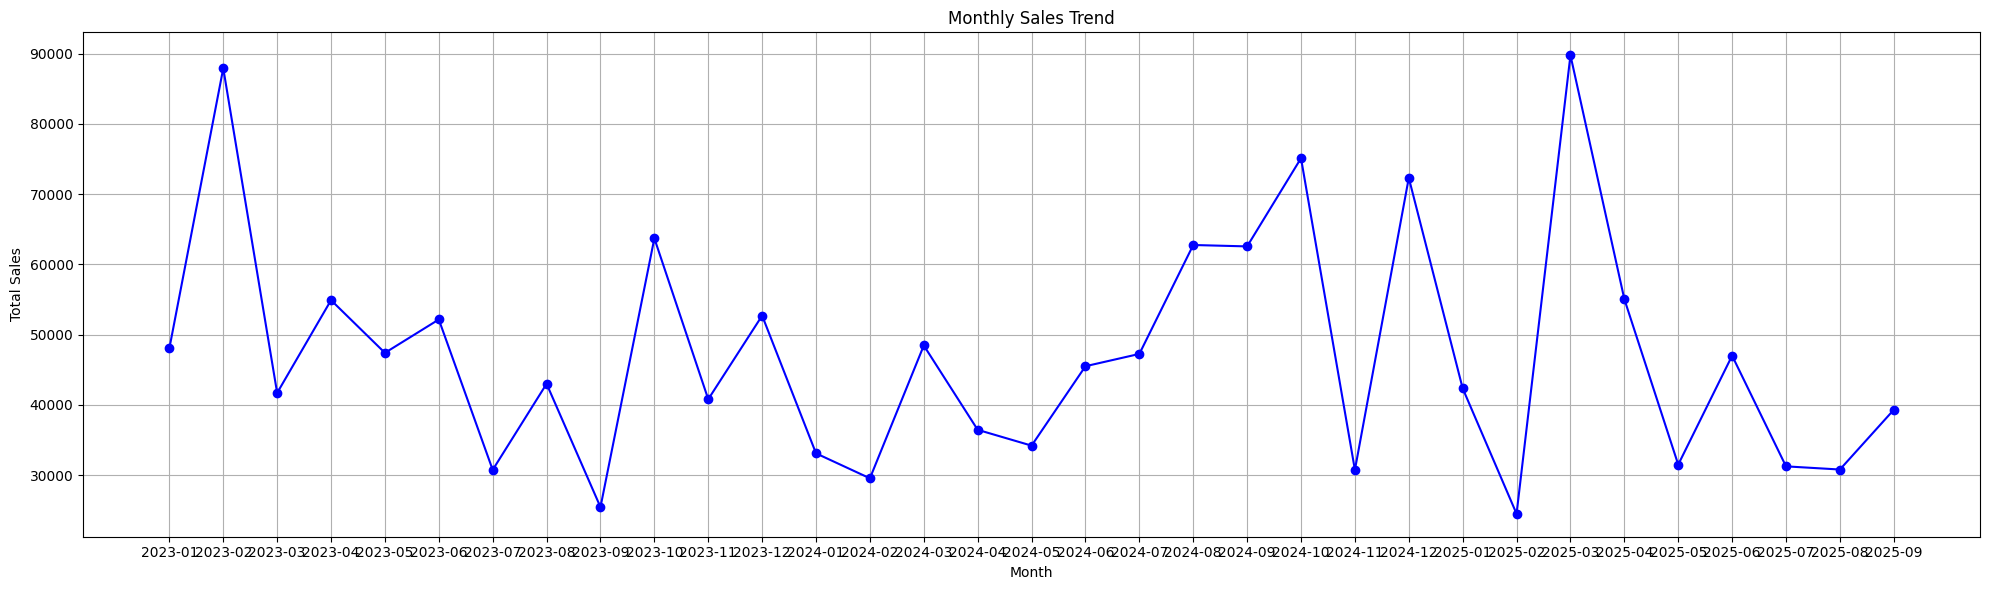

In [46]:
monthly_sales.index = monthly_sales.index.astype(str)

plt.figure(figsize=(20, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='blue')

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


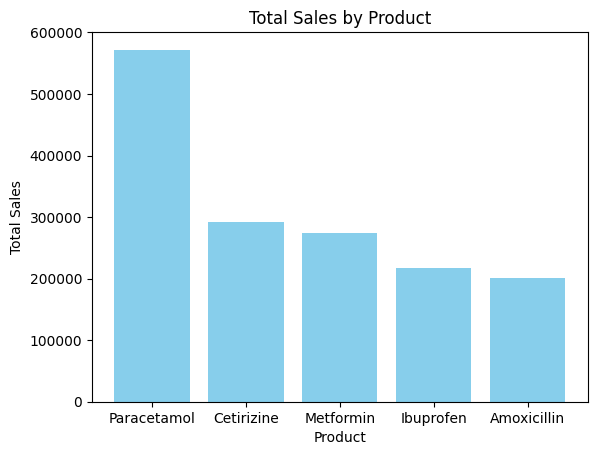

In [50]:
plt.bar(top_products.index,top_products.values,color='skyblue')
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()

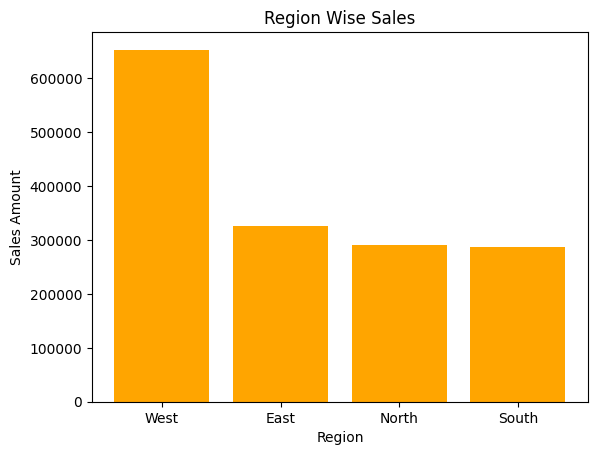

In [51]:
plt.bar(region_sales.index,region_sales.values,color='orange')
plt.title("Region Wise Sales")
plt.xlabel("Region")
plt.ylabel("Sales Amount")
plt.show()